In [24]:
import pandas as pd
import numpy as np


In [25]:
df = pd.read_csv('spam.csv')

In [26]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [28]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [30]:
import re
from textblob import TextBlob
import emoji
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('popular')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from contractions import fix

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/thegodkiller/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thegodkiller/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/thegodkiller/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/thegodkiller/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/thegodkiller/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/thegodkiller/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]   

In [31]:
def dataClean(text):
    # Convert to string if not already and handle missing values
    if pd.isna(text):
        return ""
    if not isinstance(text, str):
        text = str(text)
    
    try:
        # Case normalization
        text = text.lower()
        
        # Remove HTML, URLs, emails
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\S+@\S+', '', text)
        
        # Keep only letters and whitespace
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Expand contractions
        text = fix(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in text.split() if word not in stop_words and len(word) > 1]
        text = ' '.join(words)
        
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in text.split()]
        text = ' '.join(words)
        
        # Handle emojis (choose one approach)
        text = emoji.replace_emoji(text, replace='')  # Remove entirely
        # OR: text = emoji.demojize(text)  # Convert to text
        
        # Spelling correction (commented out as it's slow)
        # text = str(TextBlob(text).correct())
        
        return text
    
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")
        return ""  # Return empty string on failure

In [32]:
# First ensure all values are strings
df['Message'] = df['Message'].astype(str)

# Then apply cleaning
df['Message'] = df['Message'].apply(dataClean)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

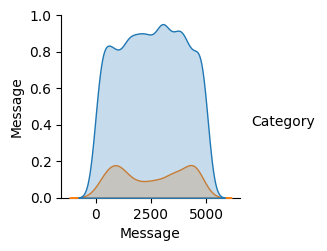

In [40]:
sns.pairplot(df, hue='Category', diag_kind='kde')
plt.show()

([<matplotlib.patches.Wedge at 0x7f9949241250>,
 [Text(-1.0038715425384215, 0.4497131597824666, '0'),
  Text(1.0038714746336121, -0.44971331136284726, '1')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.6%'),
  Text(0.5475662588910611, -0.24529816983428027, '13.4%')])

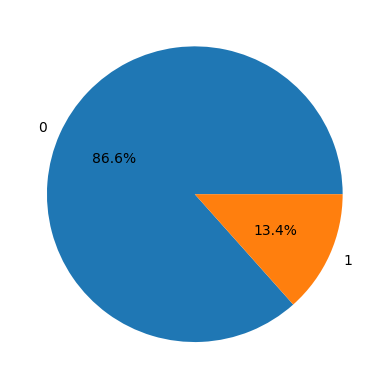

In [41]:
plt.pie(df['Category'].value_counts(), labels=df['Category'].unique(), autopct='%1.1f%%')

In [33]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset


# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
categorical_cols = ['Category', 'Message']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [34]:
df

,Category,Message
0,0,1260
1,0,3014
2,1,1087
3,0,883
4,0,2707
...,...,...
5567,1,2717
5568,0,1289
5569,0,3228
5570,0,1506


In [35]:
import keras

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(columns=['Category'], axis=1)

In [38]:
y = df['Category']